
<a name="T_1B4EA8FA"></a>

# <span style="color:rgb(213,80,0)">**Week 1: Probability, statistics & Bayes theorem**</span>

This live script provides an introduction to some probaiblity concepts and finishes with Bayes theorem. This forms the basis knowledge needed to go through Bayesian data analysis.


In [1]:
% A clear workspace is the basis for a clear mind
clear;
clc;
close all;

<a name="beginToc"></a>

## Table of Contents
&emsp;&emsp;[Visualization: histograms and cumulative probability plots](#H_21BAA359)

&emsp;&emsp;[Central tendency: mean, median, mode](#H_44C0053A)

&emsp;&emsp;[Variability: variance, density intervals ](#H_C4E95A97)

&emsp;&emsp;[Bernoulli distribution](#H_AEA9D561)

&emsp;&emsp;[Binomial distribution](#H_C520213A)

&emsp;&emsp;[Normal distribution](#H_6176EFD7)

&emsp;&emsp;[Gamma distribution](#H_CD1CF4BF)

&emsp;&emsp;[Beta distribution](#H_C592D41F)

&emsp;&emsp;[Uniform distribution](#H_90D4FE6D)

<a name="endToc"></a>
<a name="H_3AA0D437"></a>

## **Starting with coin\-flips**

We start considering likely the most exhausted example in probability textbooks: flipping a coin. This allows us to use a simple example as an introduction.


<u>The Problem</u>: We have a coin, with two sides (H: heads and T: tails) and we will flip it many times (N\-times). On each flip, we take note of the face that comes up.


1) What is the set of all possible outcomes?


Here we consider only two possible outcomes: Heads OR Tails.


Notice that whenever a heads occurs, a tails cannot occur. Therefore they are ***mutually exclusive***.


The set of all possible mutually exclusive outcomes is called the ***sample space***.


2) What is the *probability* of a coin landing heads\-up?


In general, a ***probability*** is a way of assigning a number to a set of mutually exclusive possibilities. Probabilities follow a set of rules:

-  Probabilites are bigger than zero $(p>0)$
-  The sum of all probabilities accross all event sin the sample space must be equal to 1 $(\sum_i p=1)$
-  For any two mutually exclusive events, the probability that one or the other occurs is the sum of their individual probabilities

The probability of this coin to land heads\-up will depend on its bias. If the coin is unbiased, then we would accept that the probability of heads is $\theta =0.5$ , meaning there is a 50% chance this coin will be heads or tails on a single flip. Over many trials, we would therefore expect that our fair coin yields the same proportion of heads or tails.


We can simulate such an experiment in Matlab.



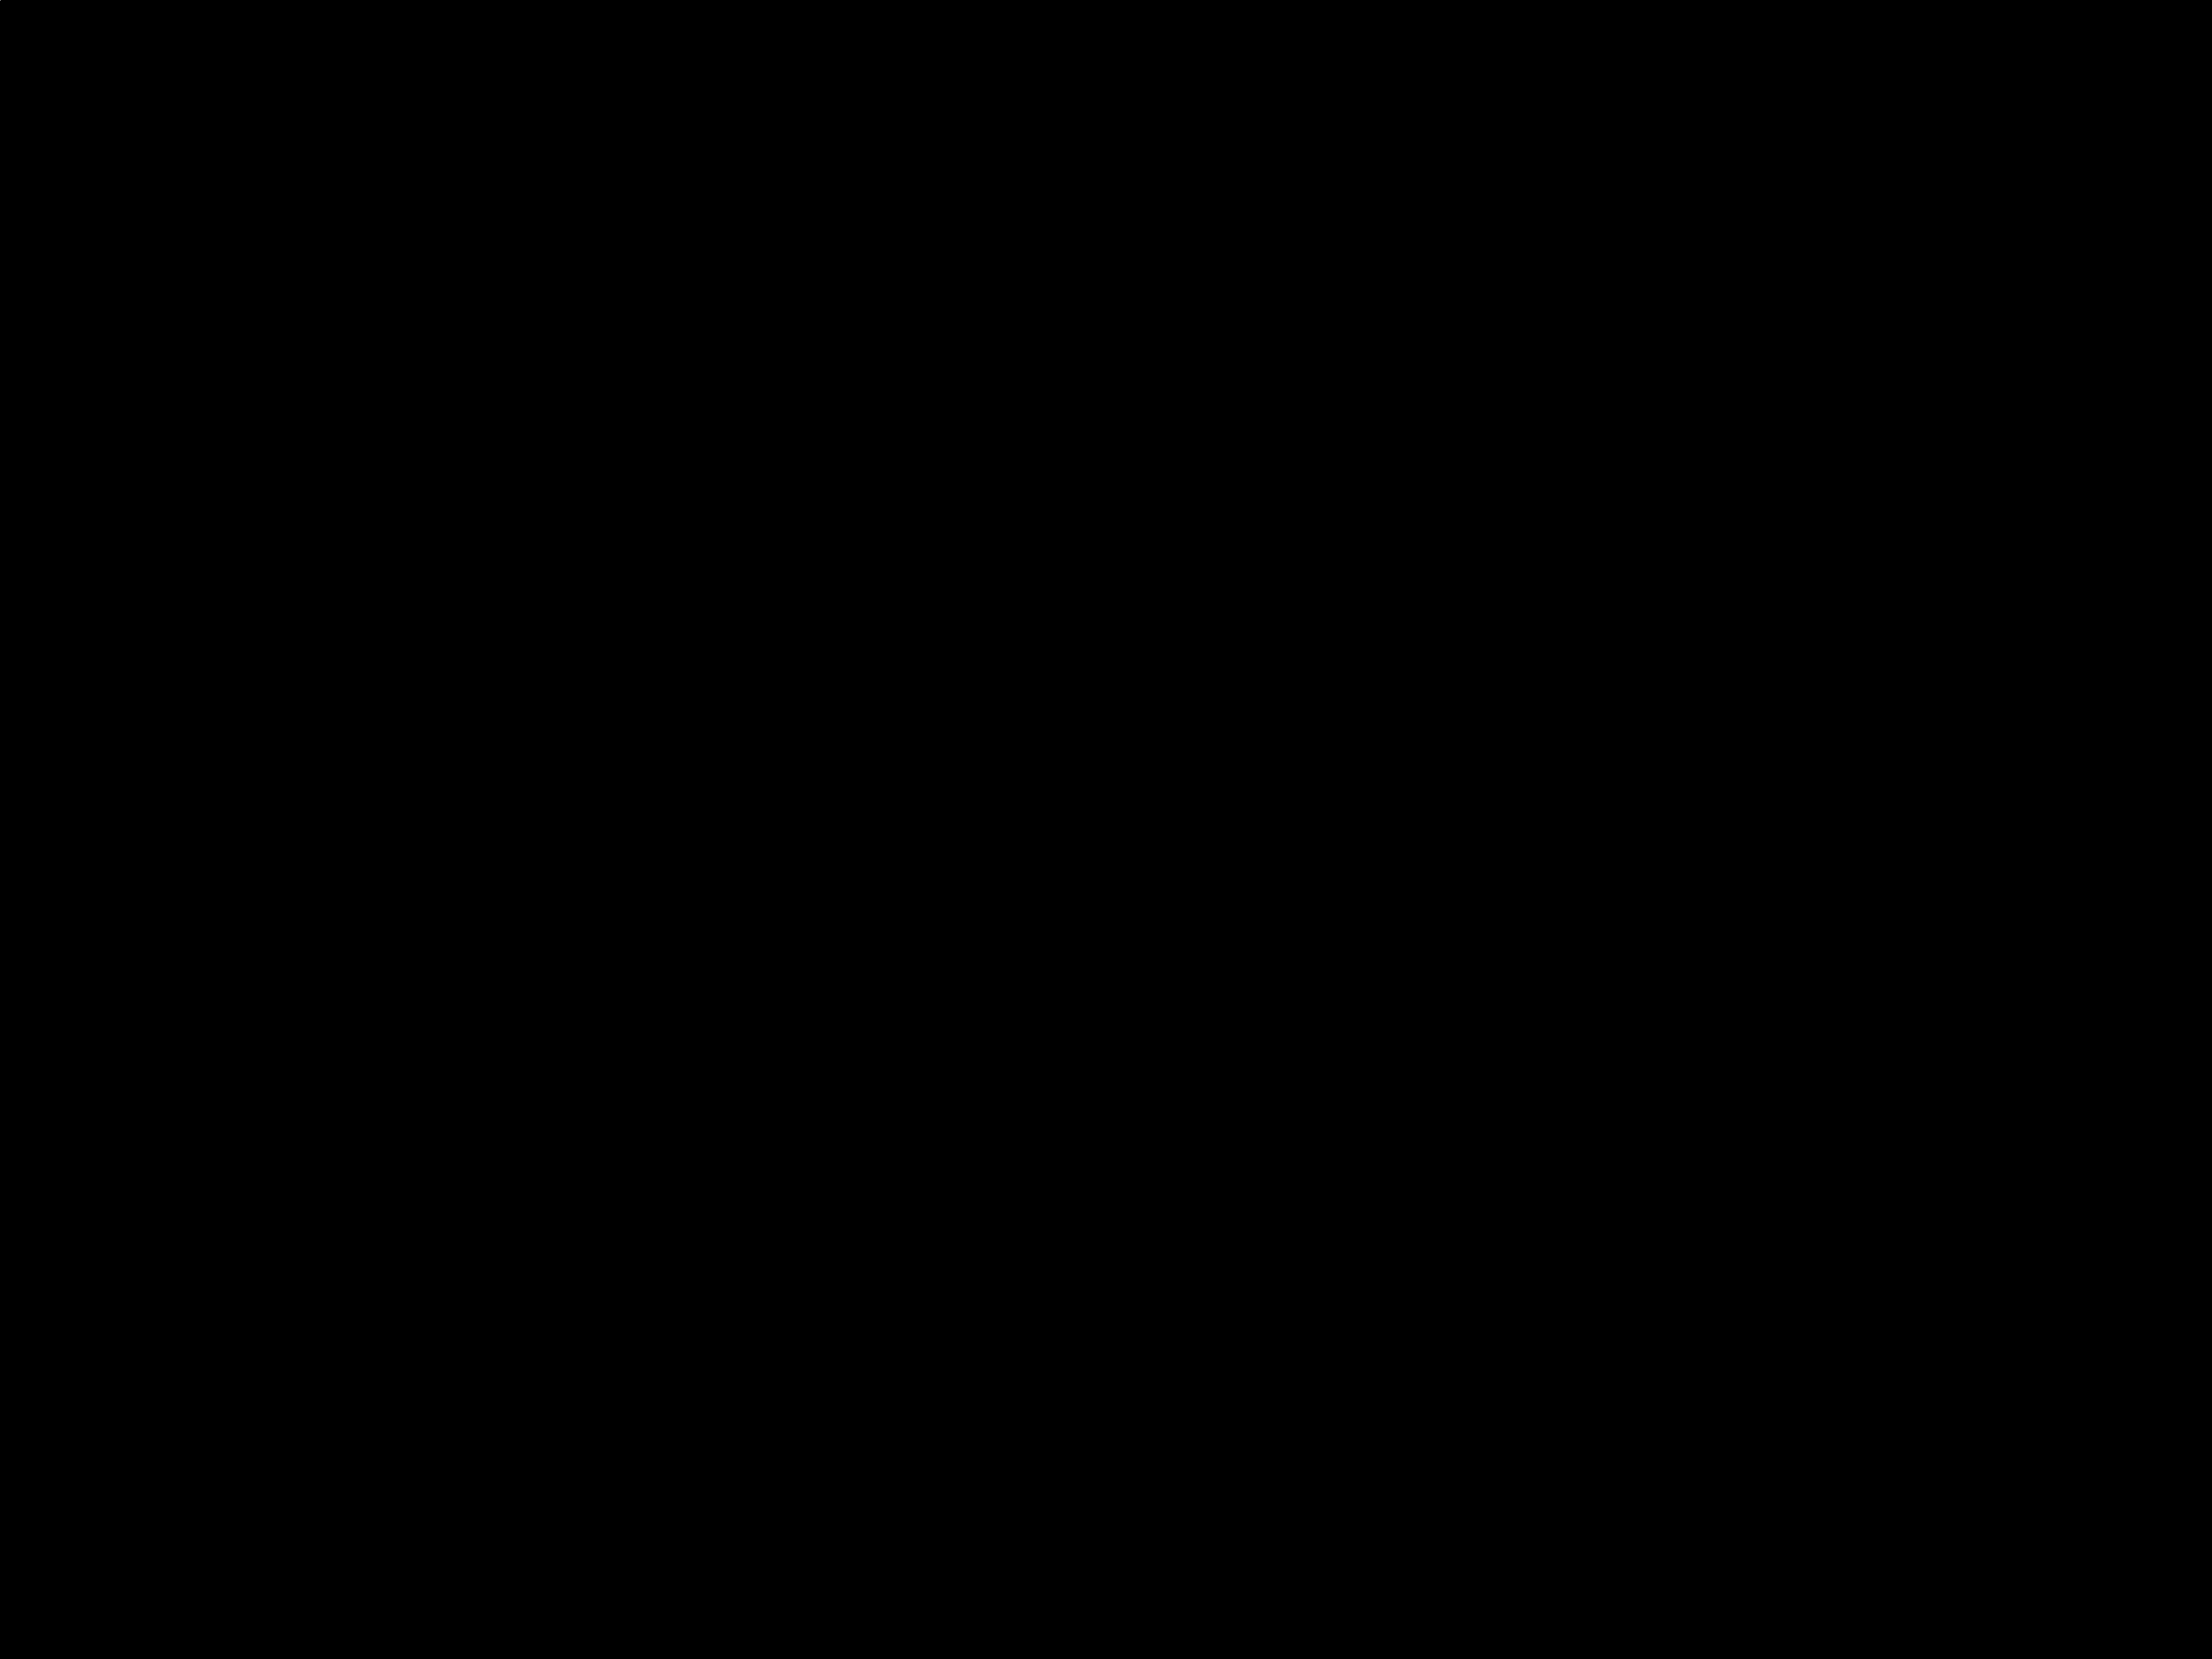

In [2]:
rng(711); % make this reproducible

% We assume that our coin is unbiased i.e. theta = 0.5
theta   = 0.5;
% Now we make 500 flips
N       = 500;
% binornd --> bino = binomial , rnd
r       = binornd(1,theta,[1,N]);

% Show sequence of heads and tails
% we do this explicitly by first taking 1=Heads and 0=Tails, then reading
% as a character vector
% sequence = r;
% sequence(sequence==1) = 'H';
% sequence(sequence==0) = 'T';
% sequence = char(sequence)

% Now we plot the sequence
figure(1)
clf
subplot(211)
plot(1:N,r,'-o');
set(gca,'xscale','log','ytick',[0,1],'yticklabel',{'Tails','Heads'},'xtick',[1,10,100,1e3],'xticklabel',[1,10,100,1e3])
xlim([0,N+1])
ylim([-0.1,1.1])
ylabel('outcome')
box off;

% Next we plot the running proportion of heads, meaning that at each flip
% we sum all the heads we had so far and divide by the number of flips. We
% can solve this by using the function 'cumsum' (cumulative sum).
Y           = cumsum(r)./(1:N);
subplot(212)
plot(1:N,Y,'-o');
hold on
plot([1,N],[theta,theta],'k--')
text(N/6,Y(end)+.2, ['end proportion: ' num2str(round(Y(end),4))] )
set(gca,'xscale','log','ytick',[0:0.2:1],'xtick',[1,10,100,1e3],'xticklabel',[1,10,100,1e3]);
xlim([0,N+1])
ylim([-0.1,1.1])
ylabel('proportion of heads')
xlabel('flip number')
box off;


The end proportion is not exactly the value of $\theta$ we assumed, but we do see that its value is converging. By measuring the frequency of heads or tails using a ***random sample***, we are able to ***approximate*** the actual probability. Still notice this is a finite sample and therefore leads to an approximation. If we were to repeat this experiment infinitely many times, the result would indeed be the undrlying probability of 0.5.

<a name="H_D45D1531"></a>

## **Moving to distributions**

Our next task is to move to a probability distribution. No longer a single number but many of them. In other words we want to see how probability gets allocated accross the set of possible outcomes. In our previous coin flipping example, this was simple, we had two outcomes, and our fair coing produced a value of $\theta =0.5$ for heads and $1-\theta =0.5$ fo tails (please, think about why the outcome for tails is treated as $1-\theta$ ). But eventually, we will look at more complex datasets, where the set of possible outcomes are no longer discrete variables such as heads or tails, but continuous ones, such as reaction times, measured in seconds or sound localization errors measured in degrees.


We will first focus on ways to describe a distribution, both visually, and numerically and then will move to some common distributions we will use.

<a name="H_4E60DEC6"></a>
<a name="H_21BAA359"></a>

#### Visualization: histograms and cumulative probability plots

The first visualization tool we consider is the histogram. This is a visual representation of the distribution of some data.


Lets start by generating some random data. For this we use the randn function (for more information type help randn in the command window).


In [3]:
N = 500; % we take 500 draws
X = randn(N,1);

<a name="H_36DC38B9"></a>

Next we will determine some bins for our histogram


In [4]:
figure(2)
clf
subplot(131)
binwidth    = 0.3;              % width of each bin
bins        = -5:binwidth:5;    % bin edges
h1           = histogram(X,'BinEdges',bins,'Normalization','count','FaceColor','w','EdgeColor','k'); % plot the histogram
ylabel('count')
xlabel('X')
box off


This plot shows the number of data points that fall within each bin. You can inspect the exact numbers by typing in the command window *h.Values*. Now lets look at a different way to normalize the data, looking at the probability mass. A probability mass corresponds to the probability allocated to a bin. Remember that a probability should comply with $\sum_i p_i =1$ , where $i$ corresponds to the $i-th$ bin. To get our probability mass, we can divide by the number of occurrences within each bin $N_{X_i }$ divided by the total number of occurences.


$$p_i =\frac{N_{X_i } }{\sum_i N_{X_i } }$$

Or simply use a probability normalization within histogram in Matlab's histogram function.


In [5]:
subplot(132)
h2           = histogram(X,'BinEdges',bins,'Normalization','probability','FaceColor','w','EdgeColor','k'); % plot the histogram
ylabel('probability mass')
xlabel('X')
box off

<a name="H_79D5A019"></a>

Finally, we consider the case of a probability density. This is the ratio of a probability mass over interval width. This means:


$$\sum_i \Delta x\frac{p_i }{\Delta x}=1$$

Where $\frac{p_i }{\Delta x}$ corresponds to the probability density, while $\Delta x$ is the binwidth. This type of representation is typically used for continuous distributions, in which the bindwidth should be infinitesimally small, therefore transforming the previous equation into an integral


$$\int p(x)dx$$

We can therefore  apply this in Matlab by dividing by the probability mass we calculated in the previous section by the binwidth.



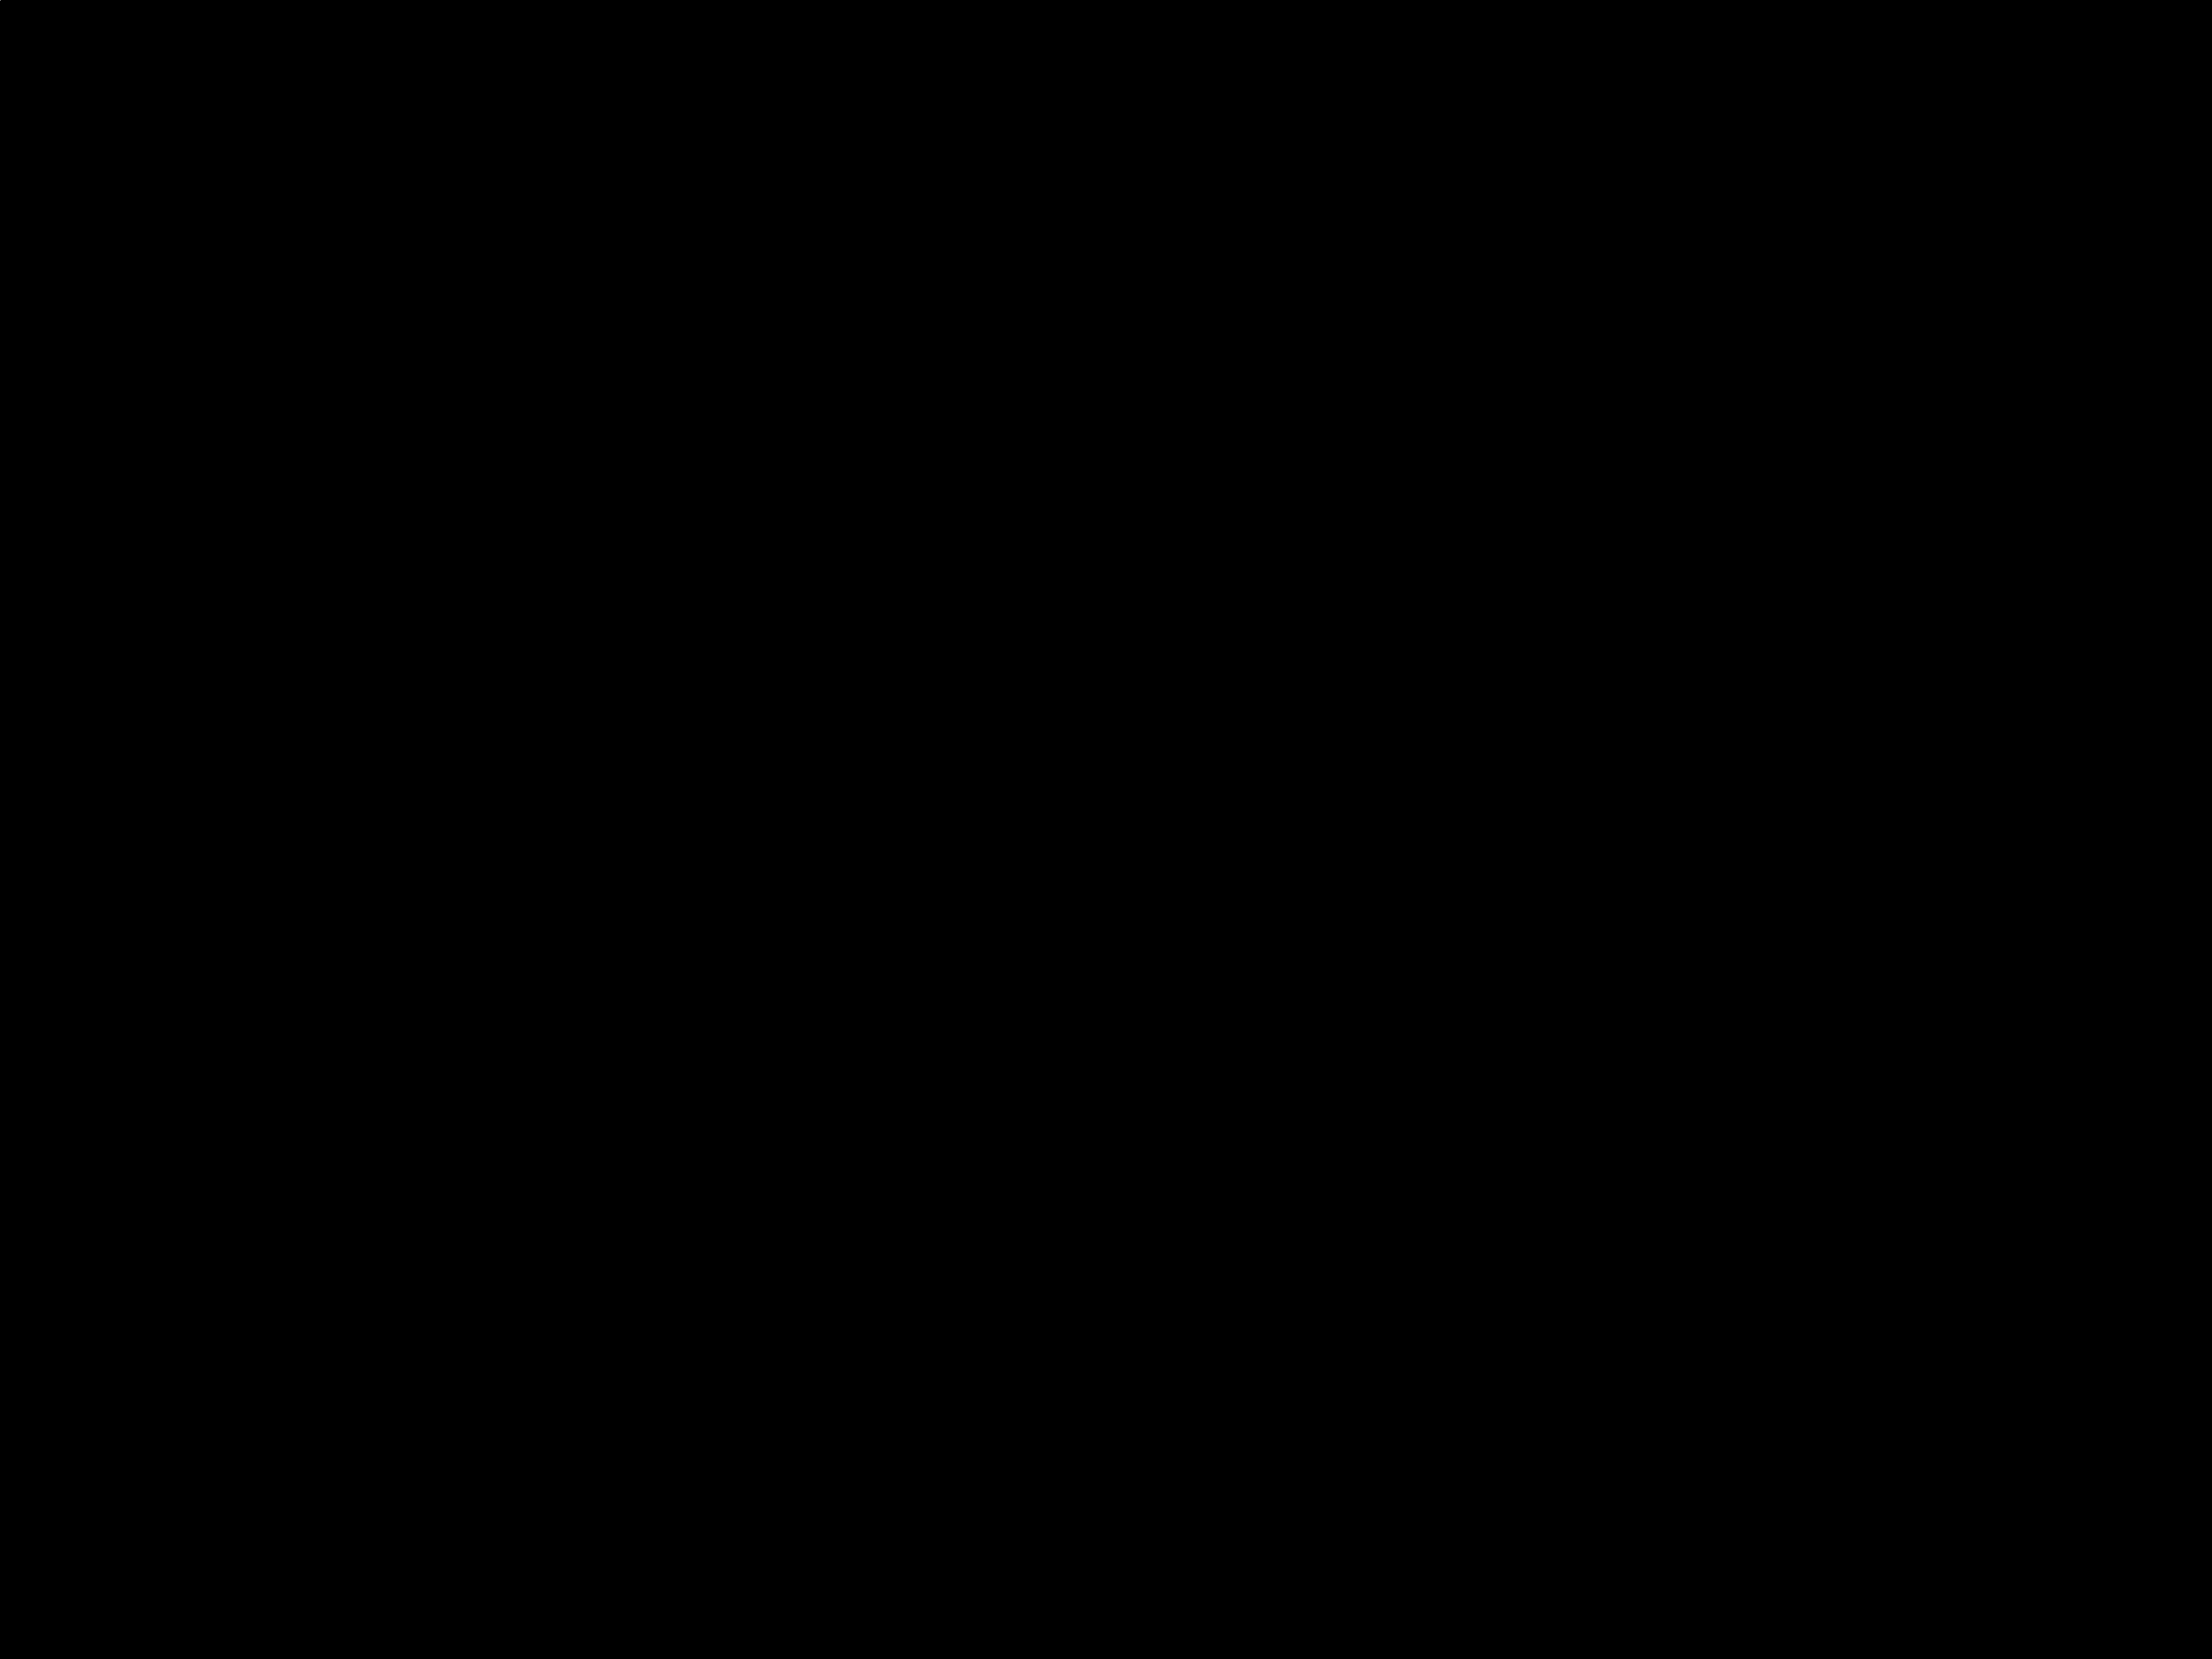

In [6]:
subplot(133)
h3           = histogram(X,'BinEdges',bins,'Normalization','pdf','FaceColor','w','EdgeColor','k'); % plot the histogram
ylabel('probability density')
xlabel('X')
box off

<a name="H_B06D61F0"></a>

Notice all of these representations depend on the binwidth used! Therefore, different bin sizes will lead to different representations. Try it out yourself.


We now move to another type of representation, which is a cumulative distribution function (CDF). By definition, a cumulative distribution function for a random variable $X$ is:


$$F_x (x)=P(X\le x)$$

You can think this of an accumulation of probability as we move along $x$ . In Matlab, we can compute this using the histogram function and a 'cdf' normalization, but to illustrate some properties, we will show it from scratch, starting from counts and moving to the cdf.



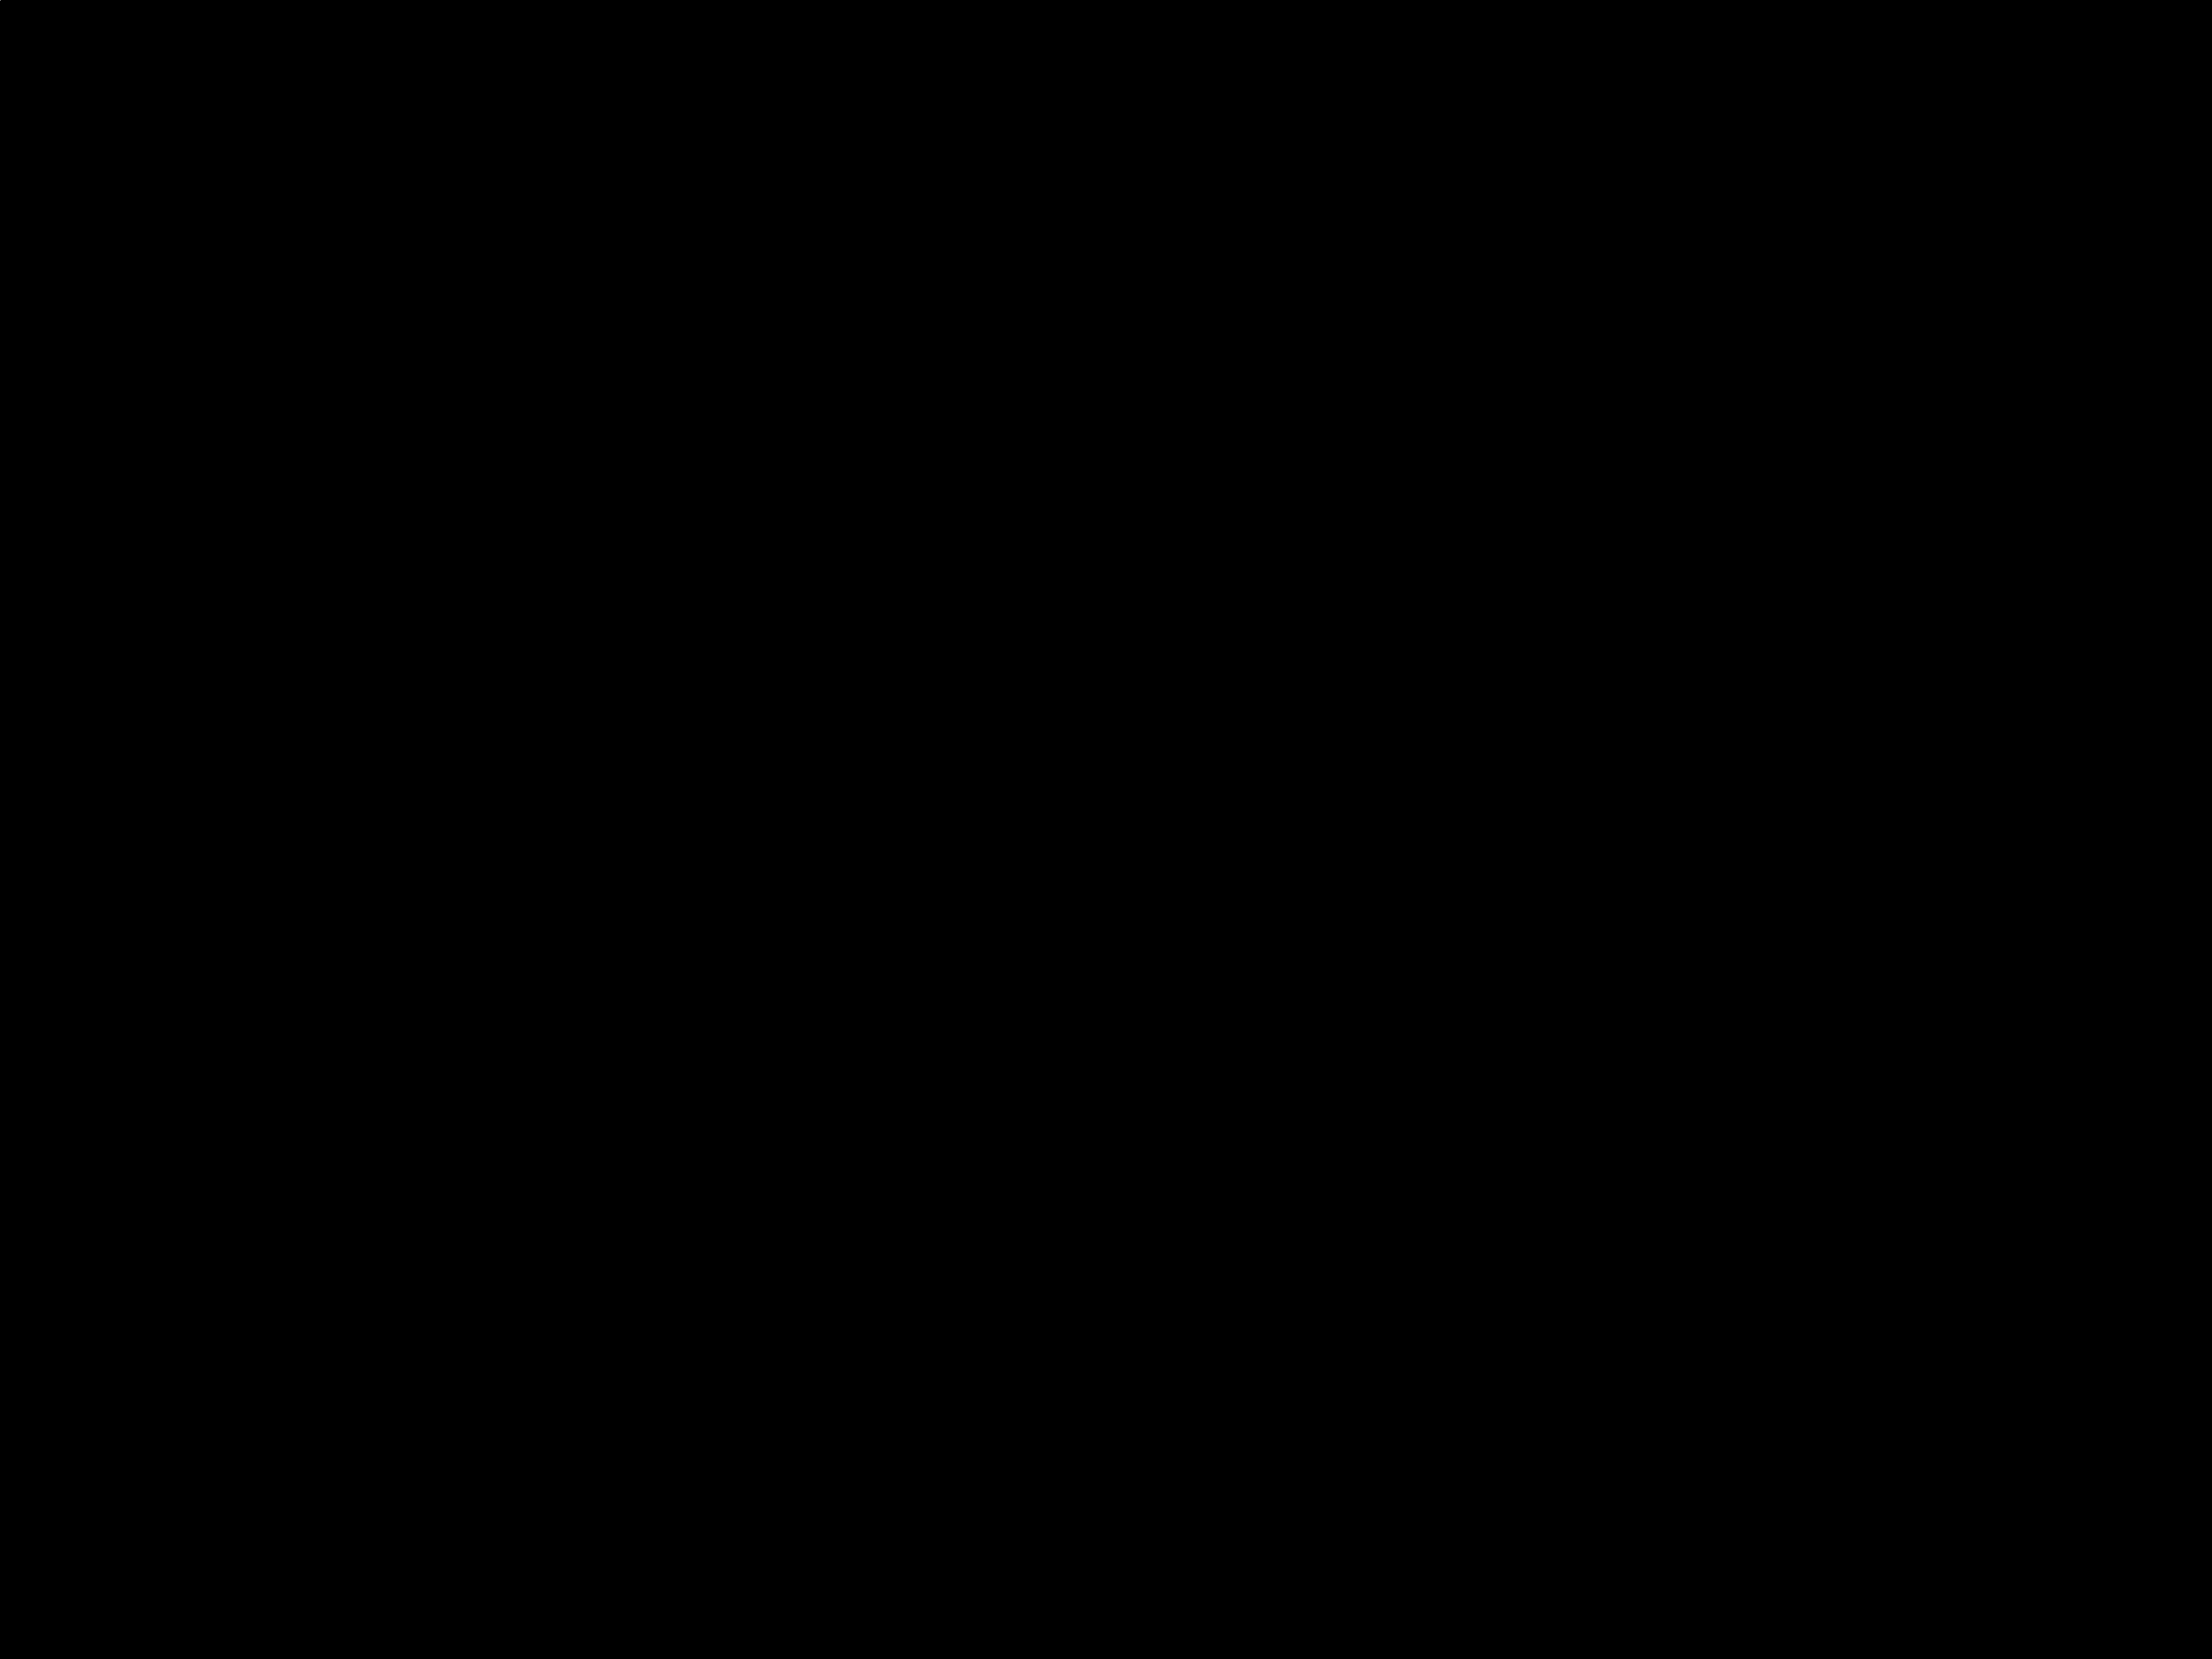

In [7]:
% Start only by counting the numbers of data points falling within each
% histogram.
figure(3)
clf;
subplot(131)
h           = histogram(X,'BinEdges',bins,'Normalization','count','FaceColor','w','EdgeColor','k');
ylabel('count')
xlabel('X')
box off
hold on

% Next we perform a cumulative sum over bins. Meaning we sum the first to
% the second, then this result to the third and so on.
bin_center = (bins(1:end-1) + bins(2:end))/2; % these are the center of the bins
hcumulative = cumsum(h.Values);
subplot(132)
plot(bin_center,hcumulative,'-ko','MarkerFaceColor','w')
ylabel('cumulative counts')
xlabel('X')
box off
ylim([-1,N+1])
hold on

% This will give a function that grows until it reaches the total number of sample we took
% Now, we can transform into a proability by simply dividing our cumulative counts by the total number of observations
hcdf = hcumulative/N;
subplot(133)
plot(bin_center,hcdf,'-ko','MarkerFaceColor','w')
ylabel('cumulative probability')
xlabel('X')
box off
ylim([-1/N,1+1/N])

<a name="H_1777E9C9"></a>

The shape of this graph is a bit less reliant on the number of bins used, which is a very nice feature of cumulative plots. Here you see an example of the effect of the binwidth used on both the probability mass plots and the cumulative probability plots.



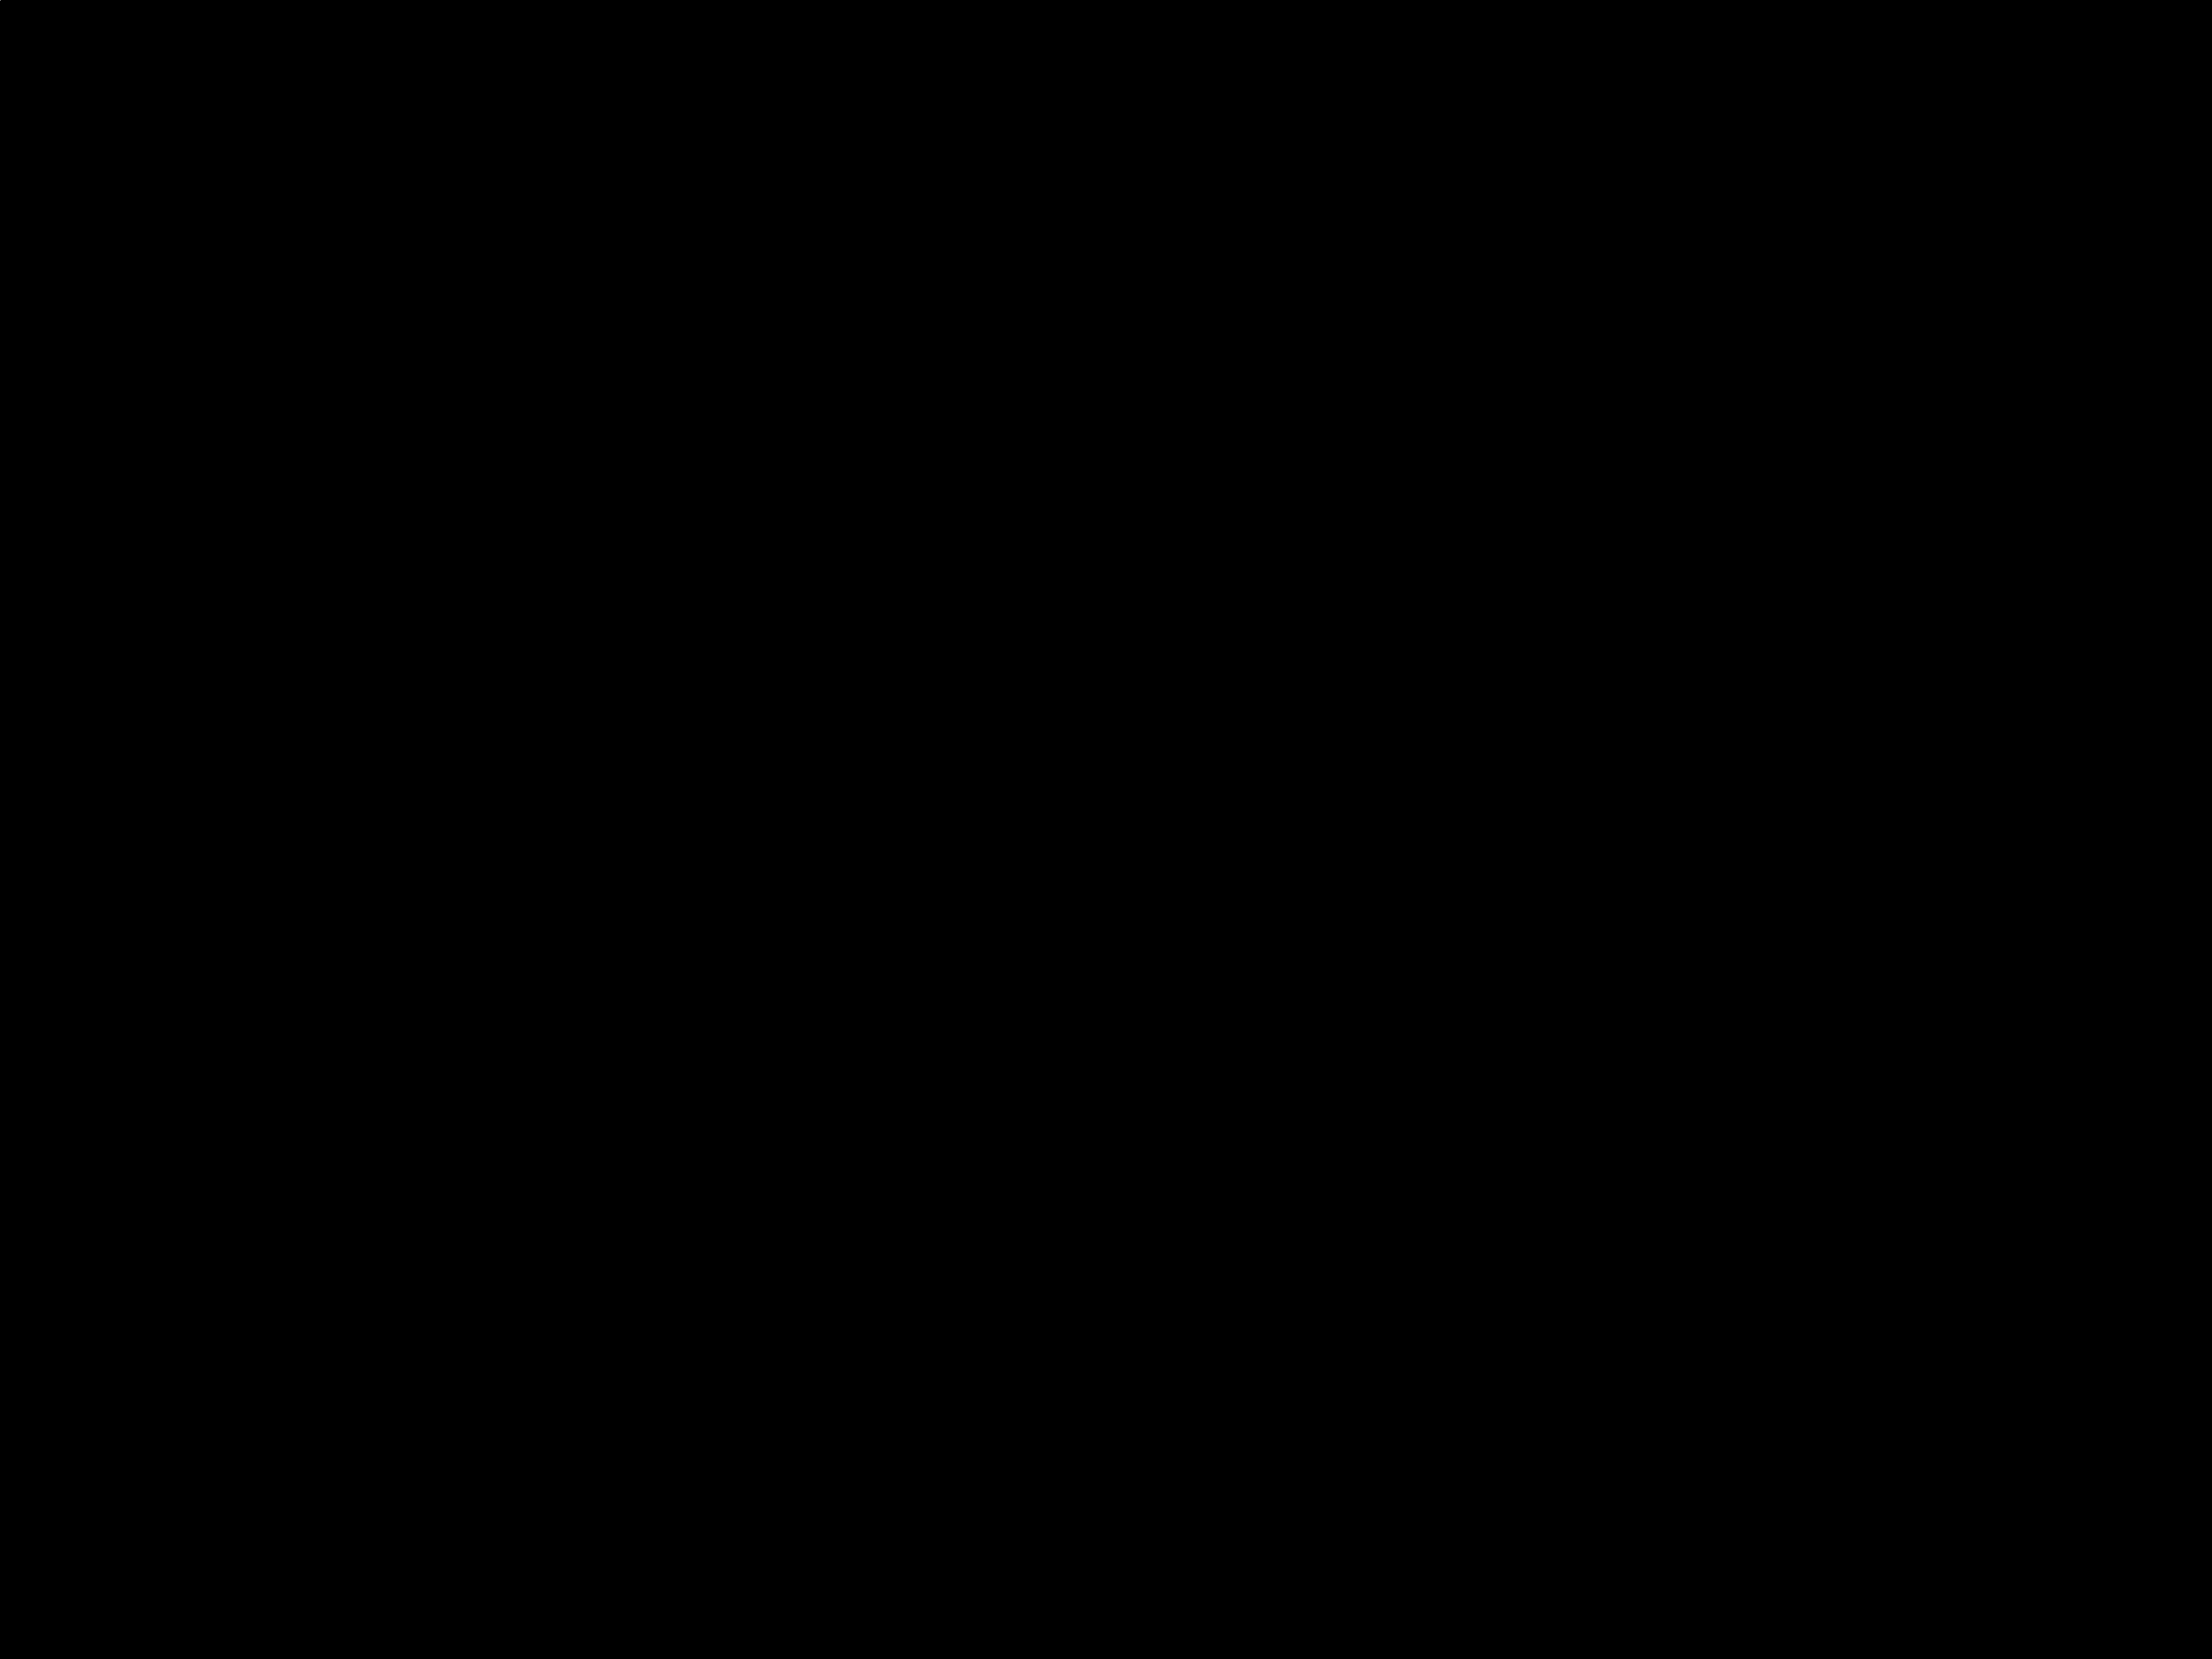

In [8]:
figure(4)
clf;
binwidth    = [0.3,0.1,0.01];     % width of each bin
cols        = lines(3); % some colors for ploting
for n_binwidth = 1:length(binwidth)
    bins        = -5:binwidth(n_binwidth):5;    % bin edges
    subplot(121)
    h           = histogram(X,'BinEdges',bins,...
        'Normalization','probability','FaceColor','w',...
        'EdgeColor',cols(n_binwidth,:)); % plot the histogram
    hold on;
    ylabel('probability');
    box off;

    subplot(122)
    h1= histcounts(X,bins);
    plot((bins(1:end-1) + bins(2:end))/2,cumsum(h1)/N,'.-',...
        'color',cols(n_binwidth,:),'markersize',12,'MarkerFaceColor','w','LineWidth',2)
    hold on;
    ylabel('cumulative probability')
    box off;
end
subplot(121)
legend([repmat('\Deltax=',size(binwidth,2),1),num2str(binwidth')],'Location','ne')


<a name="H_89261CF1"></a>

Notice also that for this example, when reaching a value of $X=3$ , already all the probability has been allocated to some bin, meaning that $P(X\le 3)\approx 1$ . Reading it out loud, this is: "the probability of the variable $X$ taking a value less than or equal to 3, is approximately 1". So we are almost certain that for any random draw, it is very likely that our variable will take a value less than or equal to three. Notice that this can be computed for any $X\le x$ .

<a name="H_44C0053A"></a>

#### Central tendency: mean, median, mode
<a name="H_C4E95A97"></a>

#### Variability: variance, density intervals

<a name="H_AEA9D561"></a>

#### Bernoulli distribution
<a name="H_FC53F0A2"></a>
<a name="H_C520213A"></a>

#### Binomial distribution
<a name="H_6176EFD7"></a>

#### Normal distribution
<a name="H_CD1CF4BF"></a>

#### Gamma distribution
<a name="H_C592D41F"></a>

#### Beta distribution
<a name="H_90D4FE6D"></a>

#### Uniform distribution
<a name="H_F8D3A32A"></a>

## **Bayes Theorem**
